Make a system which tells whether the person
will be save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

install the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading in the dataset to workspace

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Exploratory Data Analysis [EDA]

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Removing duplicated entries

In [4]:
titanic = titanic.drop_duplicates()
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.info()

Check for missing data or null values

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

Do statistical analysis to see the measure of dispersio and measure of central tendency to decide how to clean the null values in the data set

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic['age'].mode()
# if you were to pick when you have multiple mode (bimodal or multi modal) you go for the first one with index zero

0    24.0
Name: age, dtype: float64

In [8]:
modal_age = titanic['age'].mode()
modal_age

0    24.0
Name: age, dtype: float64

In [9]:
titanic['age'].median()

np.float64(28.25)

In [10]:
median_age = titanic['age'].median()
median_age

np.float64(28.25)

Round up the median value because age cannot be a float but an integer

In [11]:
median_age1 = median_age.round(decimals = 0).astype(int)
median_age1


np.int64(28)

In [12]:
titanic['age'].fillna(median_age1, inplace = True)

C:\Users\jessi\AppData\Local\Temp\ipykernel_15080\11740590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(median_age1, inplace = True)
C:\Users\jessi\AppData\Local\Temp\ipykernel_15080\11740590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age'].fillna(median_age1, inplace = True)


In [13]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 784, dtype: float64

In [16]:
#titanic['age'] = pd.set_option('display.max_rows')
#titanic['age']

In [17]:
mean_fare = titanic['fare'].mean()
mean_fare

np.float64(34.71173966836735)

In [18]:
titanic['fare'] = titanic['fare'].fillna('mean_fare')
titanic['fare']

C:\Users\jessi\AppData\Local\Temp\ipykernel_15080\3728035271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare'] = titanic['fare'].fillna('mean_fare')


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
885    29.1250
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 784, dtype: float64

In [19]:
titanic['fare'].dtype

dtype('float64')

In [20]:
titanic['fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [21]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [23]:
# how to rearrange the index after dropping rows from duplicates

In [24]:
# dropped embark because it's not needed
titanic = titanic.drop(columns = 'embarked')

In [25]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True


In [26]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le_sex = LabelEncoder()


In [29]:
# create a new column for the label encoded column

In [30]:
titanic['sex_n'] = le_sex.fit_transform(titanic['sex'])

In [31]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_n
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Third,woman,False,NaN,Queenstown,no,False,0
887,1,1,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,28.0,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,1


In [32]:
titanic = titanic.drop(columns = 'sex')

In [33]:
titanic

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_n
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Third,woman,False,NaN,Queenstown,no,False,0
887,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0
888,0,3,28.0,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,1


In [34]:
titanic['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [35]:
le_class = LabelEncoder()

In [36]:
# create a new column for the label encoded column
titanic['class_n'] = le_class.fit_transform(titanic['class'])

In [37]:
titanic = titanic.drop(columns = 'class')
titanic

,survived,pclass,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone,sex_n,class_n
0,0,3,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False,1,2
1,1,1,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False,0,0
2,1,3,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True,0,2
3,1,1,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False,0,0
4,0,3,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,woman,False,NaN,Queenstown,no,False,0,2
887,1,1,19.0,0,0,30.0000,woman,False,B,Southampton,yes,True,0,0
888,0,3,28.0,1,2,23.4500,woman,False,NaN,Southampton,no,False,0,2
889,1,1,26.0,0,0,30.0000,man,True,C,Cherbourg,yes,True,1,0


In [38]:
# now rearrange so that the dependent variable, y comes at the end
titanic = titanic[['age', 'class_n', 'sex_n', 'fare', 'survived']]
titanic

,age,class_n,sex_n,fare,survived
0,22.0,2,1,7.2500,0
1,38.0,0,0,71.2833,1
2,26.0,2,0,7.9250,1
3,35.0,0,0,53.1000,1
4,35.0,2,1,8.0500,0
...,...,...,...,...,...
885,39.0,2,0,29.1250,0
887,19.0,0,0,30.0000,1
888,28.0,2,0,23.4500,0
889,26.0,0,1,30.0000,1


Check for correlation between variables

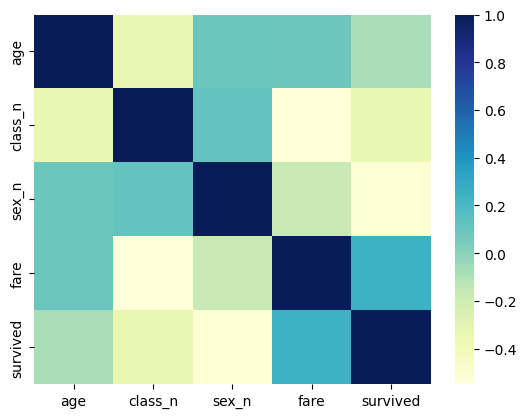

In [40]:
sns.heatmap(titanic.corr(), cmap='YlGnBu')
plt.show()

from this chart, the lower the number in class, the higher the survival meaning the higher your status, the higher the survival chance and it is also positively correlated to the fare price

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = titanic.drop(columns ='survived')
X

,age,class_n,sex_n,fare
0,22.0,2,1,7.2500
1,38.0,0,0,71.2833
2,26.0,2,0,7.9250
3,35.0,0,0,53.1000
4,35.0,2,1,8.0500
...,...,...,...,...
885,39.0,2,0,29.1250
887,19.0,0,0,30.0000
888,28.0,2,0,23.4500
889,26.0,0,1,30.0000


In [ ]:
y = titanic['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: survived, Length: 784, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train

,age,class_n,sex_n,fare
24,8.0,2,0,21.0750
520,30.0,0,0,93.5000
828,28.0,2,1,7.7500
366,60.0,0,0,75.2500
397,46.0,1,1,26.0000
...,...,...,...,...
72,21.0,1,1,73.5000
112,22.0,2,1,8.0500
287,22.0,2,1,7.8958
482,50.0,2,1,8.0500


In [ ]:
y_train

24     0
520    1
828    1
366    1
397    0
      ..
72     0
112    0
287    0
482    0
108    0
Name: survived, Length: 548, dtype: int64

In [ ]:
X_test

,age,class_n,sex_n,fare
677,18.0,2,0,9.8417
668,43.0,2,1,8.0500
222,51.0,2,1,8.0500
719,33.0,2,1,7.7750
183,1.0,1,1,39.0000
...,...,...,...,...
434,50.0,0,1,55.9000
242,29.0,1,1,10.5000
226,19.0,1,1,10.5000
660,50.0,0,1,133.6500


In [ ]:
y_test

677    1
668    0
222    0
719    0
183    1
      ..
434    0
242    0
226    1
660    1
344    0
Name: survived, Length: 236, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
# check for accuracy before you make predictions for new data


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7372881355932204

In [ ]:
X.head()

,age,class_n,sex_n,fare
0,22.0,2,1,7.2500
1,38.0,0,0,71.2833
2,26.0,2,0,7.9250
3,35.0,0,0,53.1000
4,35.0,2,1,8.0500


# make your own prediction
Would a 32year old, middle class, man that payed a fare price of 70 survive?

In [ ]:
 
predictions_n = model.predict([[32, 1, 2, 70 ]])
predictions_n

C:\Users\jessi\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# So, if there was a 32 year old, second class, man that paid a fare of 70 onboard the titanic, we predict he would not have survived